In [2]:
import tensorflow as tf
import cv2 
import os
import matplotlib.pyplot as plt
import numpy as np

In [3]:
img_array = cv2.imread("Dataset/Face_Mask/00000_Mask.jpg")

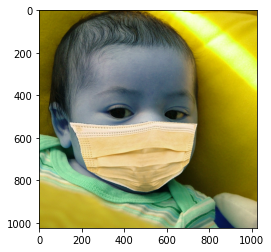

In [4]:
plt.imshow(img_array)

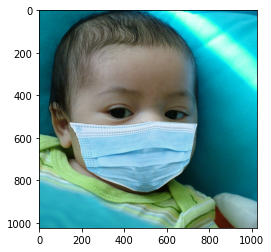

In [5]:
plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))

In [6]:
img_array.shape

(1024, 1024, 3)

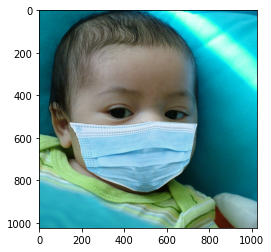

In [7]:
Datadirectory = "Dataset/"
Classes = ["Face_Mask" ,"No_Mask"]
for category in Classes:
    path = os.path.join(Datadirectory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break

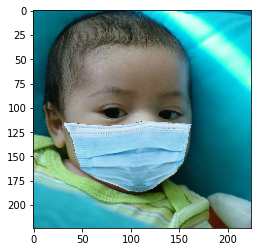

In [8]:
img_size = 224

new_array = cv2.resize(img_array, (img_size,img_size))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show()

In [9]:
training_Data = []

def create_training_Data():
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num = Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array, (img_size, img_size))
                training_Data.append([new_array,class_num])
            except Exception as e:
                pass

In [10]:
create_training_Data()

In [12]:
print(len(training_Data))

1951


In [13]:
import random 

random.shuffle(training_Data)

In [14]:
X = []
y = []

for features,label in training_Data:
    X.append(features)
    y.append(label)
    

X = np.array(X).reshape(-1, img_size, img_size, 3)

In [15]:
X.shape

(1951, 224, 224, 3)

In [16]:
X = X/255.0;

In [18]:
y[1000]

1

In [19]:
Y= np.array(y)

In [20]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [21]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

# deep learning model for training- transfer learning

In [23]:
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import layers

In [24]:
model = tf.keras.applications.mobilenet.MobileNet()

In [25]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

# transfer learning

In [26]:
base_input = model.layers[0].input

In [27]:
base_output = model.layers[-4].output

In [28]:
Flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(Flat_layer)
final_output = layers.Activation('sigmoid')(final_output)

In [29]:
new_model = keras.Model(inputs = base_input, outputs= final_output)

In [30]:
new_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0     

# settins for binary classiification

In [31]:
new_model.compile(loss="binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [37]:
new_model.fit(X,Y, epochs = 1, validation_split = 0.1)

55/55 [==============================] - 206s 4s/step - loss: 0.0034 - accuracy: 0.9989 - val_loss: 0.0860 - val_accuracy: 0.9949


In [38]:
new_model.save("my_model3.h5")

In [39]:
new_model = tf.keras.models.load_model("my_model.h5")

OSError: SavedModel file does not exist at: my_model.h5\{saved_model.pbtxt|saved_model.pb}

# checking the network for predictions

In [56]:
frame = cv2.imread("00002_Mask.jpg")

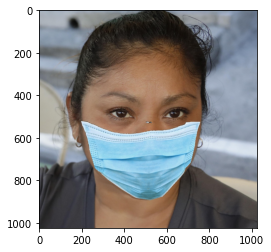

In [57]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [58]:
final_image = cv2.resize(frame,(224,224))
final_image =     np.expand_dims(final_image,axis=0)
final_image = final_image/225.0

In [59]:
predictions = new_model.predict(final_image)

In [60]:
predictions

array([[1.8300494e-16]], dtype=float32)

# Checking the Network for unknown images

In [80]:
frame = cv2.imread("face_Random.jpg")

In [81]:
frame.shape

(400, 800, 3)

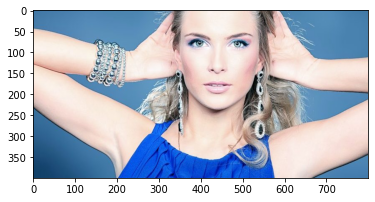

In [82]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [83]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")


In [84]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

In [85]:
gray.shape

(400, 800)

In [86]:
faces = faceCascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = frame[y:y+h, x:x+w]
    cv2.rectangle(frame, (x, y),(x+w, y+h), (255, 0, 0), 2)
    facess = faceCascade.detectMultiScale(roi_gray)
    if len(facess) == 0:
        print("Face not detected")
    else : 
        for (ex,ey,ew,eh) in facess:
            face_roi = roi_color[ey: ey+eh, ex:ex + ew]

Face not detected
Face not detected


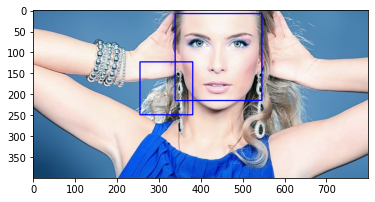

In [87]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [89]:
plt.imshow(cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB))

NameError: name 'face_roi' is not defined